# TimML test line-sink discharge

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import timml as tml

In [2]:
ml1 = tml.ModelMaq(kaq=20)
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=30)
ls1 = tml.LineSinkBase(ml1, x1=-10, y1=-10, x2=10, y2=10, Qls=1000)
ml1.solve()

Number of elements, Number of equations: 2 , 1
..
solution complete


In [3]:
print("head at center of line-sink:", ml1.head(ls1.xc, ls1.yc))
print("discharge of line-sink:", ls1.discharge())

head at center of line-sink: [19.19104524]
discharge of line-sink: [1000.]


In [4]:
ml2 = tml.ModelMaq(kaq=20)
rf2 = tml.Constant(ml2, xr=0, yr=20, hr=30)
N = 20
d = 20 / N
xw = np.arange(-10 + d / 2, 10, d)
yw = np.arange(-10 + d / 2, 10, d)
for i in range(N):
    tml.Well(ml2, xw[i], yw[i], Qw=1000 / N)
ml2.solve(silent=True)

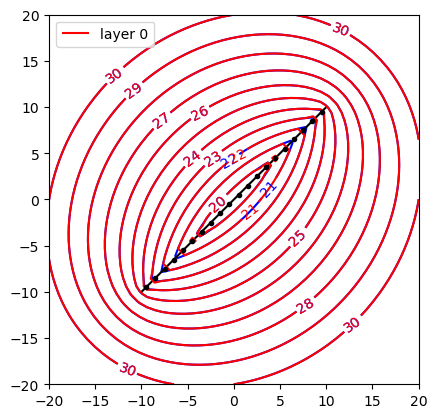

In [5]:
ml1.plots.contour([-20, 20, -20, 20], 50, [0], np.arange(20, 31, 1), color="b")
ml2.plots.contour(
    [-20, 20, -20, 20], 50, [0], np.arange(20, 31, 1), color="r", newfig=False
)

In [12]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=30)
ls1 = tml.HeadLineSink(ml1, -10, 0, 10, 0, 20, order=7, layers=0, dely=0.5) # set control point at y=0.5
ml1.solve()

Number of elements, Number of equations: 2 , 9
..
solution complete


In [15]:
for i in range(len(ls1.xc)):
    print(ls1.xc[i], ls1.yc[i], ml1.head(ls1.xc[i], ls1.yc[i], 0), ml1.head(ls1.xc[i], 0, 0))

-9.396926207859083 -9.396926207859083 20.00000000000001 24.72969511246153
-7.660444431189779 -7.660444431189779 20.000000000000007 23.80533617738303
-5.000000000000002 -5.000000000000002 20.00000000000001 22.433313893666906
-1.736481776669303 -1.736481776669303 20.000000000000007 20.849343832967794
1.7364817766693041 1.7364817766693041 20.00000000000001 20.84934383296777
4.999999999999999 4.999999999999999 20.000000000000007 22.433313893666917
7.66044443118978 7.66044443118978 20.000000000000007 23.805336177382923
9.396926207859083 9.396926207859083 20.000000000000007 24.72969511246175


In [16]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=30)
ls1 = tml.HeadLineSink(ml1, -10, -10, 10, 10, 20, order=7, layers=0)
ml1.solve()

Number of elements, Number of equations: 2 , 9
..
solution complete


In [17]:
ml2 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf2 = tml.Constant(ml2, xr=0, yr=20, hr=30)
N = 50
d = 20 / N
xw = np.arange(-10 + d / 2, 10, d)
yw = np.arange(-10 + d / 2, 10, d)
for i in range(N):
    tml.HeadWell(ml2, xw[i], yw[i], 20, layers=0)
ml2.solve(silent=True)
Qwell = 0
for i in range(N):
    Qwell += ml2.elementlist[i + 1].discharge()

In [18]:
print("discharge of line-sink:", ls1.discharge())
print("discharge of wells:", Qwell)

discharge of line-sink: [9430.28968598    0.        ]
discharge of wells: [9527.67795022    0.        ]


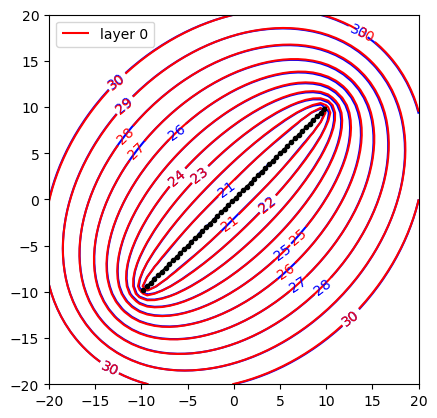

In [19]:
ml1.plots.contour([-20, 20, -20, 20], 50, [0], np.arange(20, 31, 1), color="b")
ml2.plots.contour(
    [-20, 20, -20, 20], 50, [0], np.arange(20, 31, 1), color="r", newfig=False
)

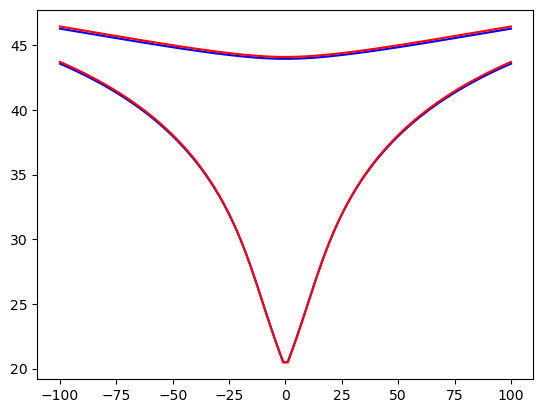

In [20]:
x = np.linspace(-100, 100, 100)
h1 = ml1.headalongline(x, 0)
h2 = ml2.headalongline(x, 0)
plt.figure()
plt.plot(x, h1.T, "b")
plt.plot(x, h2.T, "r")

## Resistance line-sink

In [ ]:
ml = tml.ModelMaq(kaq=3)
ls = tml.HeadLineSink(ml, -10, 0, 10, 0, wh=1, res=2, order=2)
rf = tml.Constant(ml, 0, 20, 2)
ml.solve()

In [ ]:
for i in range(3):
    print((ml.head(ls.xc[i], ls.yc[i]) - ls.hc) * ls.wh / ls.res)
    print(np.sum(ls.strengthinf[i] * ls.parameters[:, 0]))

In [ ]:
ml = tml.ModelMaq(kaq=[1, 2], z=[20, 10, 10, 0], c=[1000])
lslayer = 0
order = 2
ls = tml.HeadLineSink(ml, -10, 0, 10, 0, order=order, wh=1, res=2, layers=[lslayer])
rf = tml.Constant(ml, 0, 20, 2)
ml.solve()
for i in range(order + 1):
    print((ml.head(ls.xc[i], ls.yc[i]) - ls.hc[i])[lslayer] * ls.wh / ls.res)
    print(np.sum(ls.strengthinf[i] * ls.parameters[:, 0]))

In [ ]:
ml = tml.ModelMaq(kaq=[1, 2], z=[20, 12, 10, 0], c=[1000])
order = 2
ls = tml.HeadLineSink(ml, -10, 0, 10, 0, order=order, hls=1, wh=1, res=2, layers=[0, 1])
rf = tml.Constant(ml, 0, 2000, 2)
ml.solve()
for i in range(order + 1):
    for ilay in range(2):
        print(((ml.head(ls.xc[i], ls.yc[i]) - ls.hc[i]) * ls.wh / ls.res)[ilay])
        print(np.sum(ls.strengthinf[2 * i + ilay] * ls.parameters[:, 0]))

In [ ]:
print(ml.headalongline(ls.xc, ls.yc))
print(ls.hc)

## Specifying heads along line-sinks

Give one value that is applied at all control points

In [ ]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=30)
ls1 = tml.HeadLineSink(ml1, -10, 0, 10, 0, hls=20, order=2, layers=[0])
ml1.solve()
print(ml1.headalongline(ls1.xc, ls1.yc))

Give `order + 1` values, which is applied at the `order + 1` control points. This may not be so useful, as the user needs to know where those control points are. 

In [ ]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=30)
ls1 = tml.HeadLineSink(ml1, -10, 0, 10, 0, hls=[20, 19, 18], order=2, layers=[0])
ml1.solve()
print(ml1.headalongline(ls1.xc, ls1.yc))

In [ ]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=30)
ls1 = tml.HeadLineSink(ml1, -10, 0, 10, 0, hls=[19, 20], order=2, layers=[0])
ml1.solve()
print(ml1.headalongline(ls1.xc, ls1.yc))

## LineSinkDitch

In [ ]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=30)
ls1 = tml.LineSinkDitch(ml1, -10, -10, 10, 10, Qls=1000, order=2, layers=[0])
ml1.solve()
print(ml1.headalongline(ls1.xc, ls1.yc))
print(ls1.discharge())

In [ ]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=30)
ls1 = tml.LineSinkDitch(ml1, -10, -10, 10, 10, Qls=1000, order=2, layers=[0, 1])
ml1.solve()
print(ml1.headalongline(ls1.xc, ls1.yc))
print(ls1.discharge())

## Head line-sink string

In [ ]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=30)
ls1 = tml.HeadLineSinkString(
    ml1, xy=[(-10, 0), (0, 0), (10, 0), (10, 10)], hls=20, order=5, layers=[0]
)
ml1.solve()
ml1.plots.contour([-20, 20, -20, 20], 50, [0], 40)

In [ ]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=30)
ls1 = tml.HeadLineSinkString(
    ml1, xy=[(-10, 0), (0, 0), (10, 0), (10, 10)], hls=[20, 22], order=5, layers=[0]
)
ml1.solve()
ml1.plots.contour([-20, 20, -20, 20], 50, [0], 40)

In [ ]:
xls1 = np.linspace(-10, 10, 50)
yls1 = np.linspace(0, 0, 50)
hls1 = ml1.headalongline(xls1, yls1)
plt.figure()
plt.plot(xls1, hls1[0])
xls2 = np.linspace(10, 10, 50)
yls2 = np.linspace(0, 10, 50)
hls2 = ml1.headalongline(xls2, yls2)
plt.plot(10 + yls2, hls2[0])

In [ ]:
for ls in ls1.lslist:
    print(ml1.headalongline(ls.xc, ls.yc)[0])
    print(ls.hc)

### add resistance

In [ ]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=200, hr=2)
ls1 = tml.HeadLineSinkString(
    ml1,
    xy=[(-10, 0), (0, 0), (10, 0), (10, 10)],
    hls=[0, 1],
    res=2,
    wh=5,
    order=5,
    layers=[0],
)
ml1.solve()

Calculate total discharge and per linesink (using two different methods), check they
are all equal.

In [ ]:
Qtot = ls1.discharge()
Qls_sum = np.sum(ls1.discharge_per_linesink(), axis=1)
Qper_linesink_sum = np.sum([ls.discharge() for ls in ls1.lslist], axis=0)

assert np.allclose(Qtot, Qls_sum)
assert np.allclose(Qtot, Qper_linesink_sum)

In [ ]:
xls1 = np.linspace(-10, 10, 50)
yls1 = np.linspace(0, 0, 50)
hls1 = ml1.headalongline(xls1, yls1)
plt.figure()
plt.plot(xls1, hls1[0])
xls2 = np.linspace(10, 10, 50)
yls2 = np.linspace(0, 10, 50)
hls2 = ml1.headalongline(xls2, yls2)
plt.plot(10 + yls2, hls2[0])

In [ ]:
for ls in ls1.lslist:
    print(ml1.headalongline(ls.xc, ls.yc)[0])
    print(ls.hc)

In [ ]:
ls.res

## Ditch string

In [ ]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=1)
ls1 = tml.LineSinkDitchString(
    ml1, xy=[(-10, 0), (0, 0), (10, 0)], Qls=100, wh=2, res=5, order=2, layers=[0]
)
ml1.solve()
print("discharge:", ls1.discharge())

In [ ]:
ml1.plots.contour([-20, 20, -20, 20], 50, [0], 20)

### Ditch in different layers

In [ ]:
ml1 = tml.ModelMaq(kaq=[20, 10], z=[20, 12, 10, 0], c=[100])
rf1 = tml.Constant(ml1, xr=0, yr=20, hr=1)
ls1 = tml.LineSinkDitchString(
    ml1,
    xy=[(-10, 0), (0, 0), (10, 0), (10, 20)],
    Qls=100,
    wh=2,
    res=5,
    order=2,
    layers=[0, 1, 0],
)
ml1.solve()

### Angle well

In [ ]:
ml = tml.Model3D(
    kaq=1,
    z=np.arange(10, -0.1, -0.2),
    kzoverkh=0.1,
    topboundary="semi",
    topres=0,
    topthick=2,
    hstar=7,
)
xy = list(zip(np.linspace(-10, 10, 21), np.zeros(21), strict=False))
ls = tml.LineSinkDitchString(
    ml, xy=xy, Qls=100, wh=2, res=5, order=2, layers=np.arange(10, 30, 1)
)
ml.solve()

In [ ]:
ml.plots.vcontour([-20, 20, 0, 0], 100, 20)